In [1]:
!pip install matplotlib
!pip install vega_datasets
!pip install --upgrade folium

You should consider upgrading via the 'c:\users\katherine\appdata\local\programs\python\python37-32\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\katherine\appdata\local\programs\python\python37-32\python.exe -m pip install --upgrade pip' command.



Requirement already up-to-date: folium in c:\users\katherine\appdata\local\programs\python\python37-32\lib\site-packages (0.10.1)


You should consider upgrading via the 'c:\users\katherine\appdata\local\programs\python\python37-32\python.exe -m pip install --upgrade pip' command.


## 1 - Retrieving the latest dataset from source:

In [163]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import altair as alt
import numpy as np
from vega_datasets import data

data_url_counties = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
data_url_states = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"
us_counties = pd.read_csv(data_url_counties, error_bad_lines=False)
display(us_counties.head())
display(us_counties.info())

us_states = pd.read_csv(data_url_states, error_bad_lines=False)
display(us_states.head())
display(us_states.info())

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123949 entries, 0 to 123948
Data columns (total 6 columns):
date      123949 non-null object
county    123949 non-null object
state     123949 non-null object
fips      122518 non-null float64
cases     123949 non-null int64
deaths    123949 non-null int64
dtypes: float64(1), int64(2), object(3)
memory usage: 5.7+ MB


None

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3644 entries, 0 to 3643
Data columns (total 5 columns):
date      3644 non-null object
state     3644 non-null object
fips      3644 non-null int64
cases     3644 non-null int64
deaths    3644 non-null int64
dtypes: int64(3), object(2)
memory usage: 142.5+ KB


None

## 2 - Get basic information of cases in each state on current day
We retrieve the latest date that the data includes, and display the distribution of cases for each state on the latest day, as well as the total number of cases on the latest day. We are only considering the 50 states, Washington DC, and Puerto Rico. 

In [164]:
from datetime import datetime, timedelta



#get the date range of the data
total_dates = us_states["date"].unique()
date_range = [total_dates[1],total_dates[len(total_dates)-1]]
print("Date range of data: " + str(date_range[0]) + " to " + str(date_range[1]))

#extract the latest data
latest_date = date_range[1]
latest_date_dt = datetime.strptime(latest_date, '%Y-%m-%d')
latest_cases = us_states[us_states["date"]==latest_date]
latest_cases = latest_cases[latest_cases.state != 'Guam']
latest_cases = latest_cases[latest_cases.state != 'Northern Mariana Islands']
latest_cases = latest_cases[latest_cases.state != 'Virgin Islands']
latest_cases = latest_cases[latest_cases.state != 'American Samoa']
latest_cases = latest_cases[latest_cases.state != 'Puerto Rico']

display(latest_cases)

#get the latest total cases
total_cases = latest_cases["cases"].sum()
print("Total cases on " + str(latest_date) + ": "+  str(total_cases))

latest_cases.shape

Date range of data: 2020-01-22 to 2020-05-07


,date,state,fips,cases,deaths
3589,2020-05-07,Alabama,1,9046,369
3590,2020-05-07,Alaska,2,373,8
3591,2020-05-07,Arizona,4,9945,450
3592,2020-05-07,Arkansas,5,3694,88
3593,2020-05-07,California,6,62481,2561
3594,2020-05-07,Colorado,8,18264,942
3595,2020-05-07,Connecticut,9,31784,2797
3596,2020-05-07,Delaware,10,5939,202
3597,2020-05-07,District of Columbia,11,5654,285
3598,2020-05-07,Florida,12,38820,1599


Total cases on 2020-05-07: 1260775


(51, 5)

## 3 - Basic Descriptive Statistics
We look at the range, mean, and standard deviation in number of cases and deaths on March 14, 2020, compared to April 8, 2020. We chose March 14, 2020, because that is the first date on which all 52 locations reported at least one case. Below are the distributions of values for these dates. 

Stats for March 14, 2020

Cases:

Min: 1 (Alaska)
Max: 610 (New York)
Mean: 55.73076923076923
Std Dev: 125.37334291276665

Deaths:

Min: 0 (Alabama)
Max: 40 (Washington)
Mean: 1.1538461538461537
Std Dev: 5.570878817511352



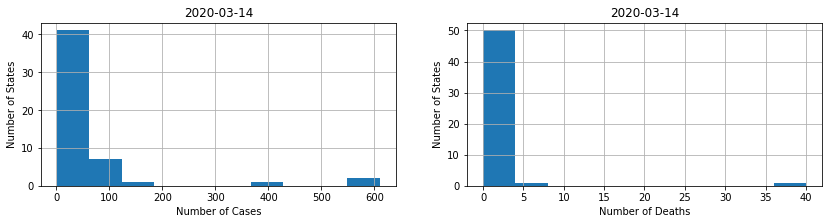

In [165]:
#data for first_date
first_date = "2020-03-14"
first_date_cases = us_states[us_states["date"]==first_date]
first_date_cases = first_date_cases[first_date_cases.state != 'Guam']
first_date_cases = first_date_cases[first_date_cases.state != 'Northern Mariana Islands']
first_date_cases = first_date_cases[first_date_cases.state != 'Virgins Islands']

#min, max, mean, and std dev for first_date cases
first_max_c = first_date_cases['cases'].max()
first_max_idx_c = first_date_cases['cases'].idxmax()
first_max_state_c = first_date_cases['state'][first_max_idx_c]

first_min_c = first_date_cases['cases'].min()
first_min_idx_c = first_date_cases['cases'].idxmin()
first_min_state_c = first_date_cases['state'][first_min_idx_c]

first_mean_c = first_date_cases['cases'].mean()
first_std_c = first_date_cases['cases'].std()

print("Stats for March 14, 2020\n")

#print stats for first_date cases
print("Cases:\n")
print("Min: " + str(first_min_c) + " (" + first_min_state_c + ")")
print("Max: " + str(first_max_c)+ " (" + first_max_state_c + ")")
print("Mean: " + str(first_mean_c))
print("Std Dev: " + str(first_std_c) + "\n")

#min, max, mean, and std dev for first_date deaths
first_max_d = first_date_cases['deaths'].max()
first_max_idx_d = first_date_cases['deaths'].idxmax()
first_max_state_d = first_date_cases['state'][first_max_idx_d]

first_min_d = first_date_cases['deaths'].min()
first_min_idx_d = first_date_cases['deaths'].idxmin()
first_min_state_d = first_date_cases['state'][first_min_idx_d]

first_mean_d = first_date_cases['deaths'].mean()
first_std_d = first_date_cases['deaths'].std()

#print stats for first_date deaths
print("Deaths:\n")
print("Min: " + str(first_min_d) + " (" + first_min_state_d + ")")
print("Max: " + str(first_max_d)+ " (" + first_max_state_d + ")")
print("Mean: " + str(first_mean_d))
print("Std Dev: " + str(first_std_d) + "\n")

#plot stats for first_date
first_date_f = plt.figure(figsize=(14,3))

first_ax_c = first_date_f.add_subplot(121)
first_ax_d = first_date_f.add_subplot(122)

first_ax_c.set_title(first_date)
first_ax_c.set_xlabel("Number of Cases")
first_ax_c.set_ylabel("Number of States")

first_ax_d.set_title(first_date)
first_ax_d.set_xlabel("Number of Deaths")
first_ax_d.set_ylabel("Number of States")

first_date_cases["cases"].hist(bins=10, ax=first_ax_c)
first_date_cases["deaths"].hist(bins=10, ax=first_ax_d)
plt.show()

Stats for April 8, 2020

Cases:

Min: 224 (Alaska)
Max: 151271 (New York)
Mean: 8282.76923076923
Std Dev: 21807.6904870065

Deaths:

Min: 0 (Wyoming)
Max: 8138 (New York)
Mean: 320.5
Std Dev: 1137.925089715453


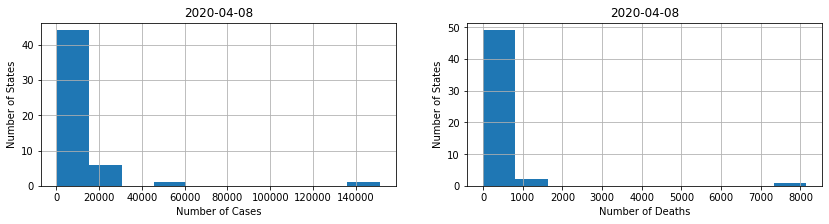

In [166]:
#data for last_date
last_date = "2020-04-08"
last_date_cases = us_states[us_states["date"]==last_date]
last_date_cases = last_date_cases[last_date_cases.state != 'Guam']
last_date_cases = last_date_cases[last_date_cases.state != 'Northern Mariana Islands']
last_date_cases = last_date_cases[last_date_cases.state != 'Virgin Islands']

#min, max, mean, and std dev for first_date cases
last_max_c = last_date_cases['cases'].max()
last_max_idx_c = last_date_cases['cases'].idxmax()
last_max_state_c = last_date_cases['state'][last_max_idx_c]

last_min_c = last_date_cases['cases'].min()
last_min_idx_c = last_date_cases['cases'].idxmin()
last_min_state_c = last_date_cases['state'][last_min_idx_c]

last_mean_c = last_date_cases['cases'].mean()
last_std_c = last_date_cases['cases'].std()

#print stats for last_date cases
print("Stats for April 8, 2020\n")
print("Cases:\n")
print("Min: " + str(last_min_c) + " (" + last_min_state_c + ")")
print("Max: " + str(last_max_c)+ " (" + last_max_state_c + ")")
print("Mean: " + str(last_mean_c))
print("Std Dev: " + str(last_std_c) + "\n")

#min, max, mean, and std dev for last_date deaths
last_max_d = last_date_cases['deaths'].max()
last_max_idx_d = last_date_cases['deaths'].idxmax()
last_max_state_d = last_date_cases['state'][last_max_idx_d]

last_min_d = last_date_cases['deaths'].min()
last_min_idx_d = last_date_cases['deaths'].idxmin()
last_min_state_d = last_date_cases['state'][last_min_idx_d]

last_mean_d = last_date_cases['deaths'].mean()
last_std_d = last_date_cases['deaths'].std()

#print stats for last_date deaths
print("Deaths:\n")
print("Min: " + str(last_min_d) + " (" + last_min_state_d + ")")
print("Max: " + str(last_max_d)+ " (" + last_max_state_d + ")")
print("Mean: " + str(last_mean_d))
print("Std Dev: " + str(last_std_d))

#plot stats for last_date 
last_date_f = plt.figure(figsize=(14,3))

last_ax_c = last_date_f.add_subplot(121)
last_ax_d = last_date_f.add_subplot(122)

last_ax_c.set_title(last_date)
last_ax_c.set_xlabel("Number of Cases")
last_ax_c.set_ylabel("Number of States")

last_ax_d.set_title(last_date)
last_ax_d.set_xlabel("Number of Deaths")
last_ax_d.set_ylabel("Number of States")

last_date_cases["cases"].hist(bins=10, ax=last_ax_c)
last_date_cases["deaths"].hist(bins=10, ax=last_ax_d)
plt.show()

## 4 - Examining the trend of when states began reporting cases in the US

Text(0, 0.5, 'Number of States')

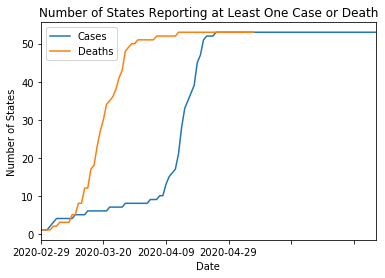

In [167]:
states_only = us_states[us_states.state != 'Guam']
states_only = states_only[states_only.state != 'Northern Mariana Islands']
states_only = states_only[states_only.state != 'Virgins Islands']

first_case_series = states_only.groupby('date').size()
first_case_series.plot(kind="line", label="Cases", legend=True, title="Number of States Reporting at Least One Case or Death")

states_only = states_only[states_only.deaths > 0]
first_death_series = states_only.groupby('date').size()
first_death_series.plot(kind="line", label="Deaths", legend="True")

plt.xlabel('Date')
plt.ylabel('Number of States')

## 5 - Examining case growth curves in "hot spot" states
We defined 'hot spot' states as those who make up more than 4% of the country's cases on the latest date recorded


In [168]:
us_states['date'] = pd.to_datetime(us_states['date'], format="%Y/%m/%d")

recent_cases = us_states[us_states['date']>"2020-03-1"]
hotspot_threshold=total_cases*.04

states_slow_growth = recent_cases[recent_cases['date']==latest_date]
states_slow_growth = states_slow_growth[states_slow_growth['cases']<hotspot_threshold]
states_slow_growth= states_slow_growth["state"]
recent_cases_hot_spot = recent_cases[~recent_cases.state.isin(states_slow_growth)]

scales = alt.selection_interval(bind='scales')
highlight = alt.selection(type='single', on='mouseover', fields=['state'], nearest=True)

base = alt.Chart(recent_cases_hot_spot).mark_line(point=True).encode(
    y=alt.Y('cases:Q', axis=alt.Axis(title='Total Cases')),
#     x='date:T',
    x=alt.X('date:T', axis=alt.Axis(format='%b %d', title='Date')),
#     y='cases:Q',
    color='state:N',
    tooltip=['state', 'cases', 'date']
)


points = base.mark_circle().encode(
    opacity=alt.value(1)
).add_selection(
    highlight
).properties(
    width=600,
    title='Total cases in hot spot states growth curve'
)


lines = base.mark_line().encode(
    size=alt.condition(~highlight, alt.value(1.25), alt.value(3))
)

display(points + lines)


alt.LayerChart(...)

## 6 - Examining percentage of cases compared to all states
The below chart maps which states have the majority of cases at a given date. We can see how Washington and California originally had majority of cases in the U.S., and how quickly New York took over, and continues to make up a large percentage of cases in the U.S.

In [169]:
chart = alt.Chart(recent_cases).mark_area().encode(
    x=alt.X('date:T', axis=alt.Axis(format='%b %d', title='Date')),
    y=alt.Y('cases:Q', stack="normalize", axis=alt.Axis(format='%', title='Percent of Total Cases')), 
#     x="date:T",
#     y=alt.Y("cases:Q", stack="normalize"),
    tooltip=['state', 'cases', 'date'],
    color= alt.Color('state:N', scale=alt.Scale(scheme='category20b'))

).properties(
    width=700,
    height=550,
    title="Distribution of cases among all states"
)

display(chart)

alt.Chart(...)

## 7 - Examining cases in New Jersey
We will take a look at how cases are distributed by county in New Jersey.

The map below shows an interesting distrubution of cases in the sense that the more north-east the county is, the higher the number of cases. This could be attributed to the fact that north Jersey is very densely populated, as well as its proximity to New York City.

TODO eventually:
https://towardsdatascience.com/how-to-build-a-time-series-dashboard-in-python-with-panel-altair-and-a-jupyter-notebook-c0ed40f02289

https://nextjournal.com/sdanisch/data-types-graphical-marks-and-visual-encoding-channels

In [170]:
counties = alt.topo_feature(data.us_10m.url, 'counties')
# airports = data.airports.url


nj_county_coord = pd.read_csv("nj_county_coordinates.csv", error_bad_lines=False)
nj_county_coord=nj_county_coord.set_index('county')


jersey_cases = us_counties.loc[(us_counties['date']==latest_date) & (us_counties['state']=='New Jersey') ]
jersey_cases= jersey_cases.set_index('county')


jersey_cases['lat']= nj_county_coord['lat']
jersey_cases['long']= nj_county_coord['long']
jersey_cases=jersey_cases.drop(['Unknown'])
jersey_cases=jersey_cases.reset_index()
# display(jersey_cases)


map_jersey =(
    alt.Chart(counties).mark_geoshape(
        fill='#fffafc',
        stroke='darkgray'
    ).transform_calculate(state_id = "(datum.id / 1000)|0")
    .transform_filter((alt.datum.state_id)==34)
).properties(
    width=800,
    height=600
).project('albersUsa')


# county positions on background
points = alt.Chart(jersey_cases).mark_point(filled=True, size=200).encode(
    longitude='long:Q',
    latitude='lat:Q',
    size=alt.Size('cases:Q', title='Number of Cases'),
    color=alt.Color('cases:Q', scale=alt.Scale(scheme='yelloworangered')),
    tooltip=['cases:N','county:N']
).properties(
    title='Cases in NJ'
)
# .transform_filter((datum.symbol == ticker) # this ties in the filter 
# .add_selection(select_date).transform_filter(select_date)

map_jersey + points


alt.LayerChart(...)

## 8 - Heatmap of cases in America

In [171]:
import folium
import folium.plugins # The Folium Javascript Map Library

USA_COORDINATES = (39.8283, -98.5795)
usa_map = folium.Map(location=USA_COORDINATES,zoom_start=3)
state_geo = 'us-states.json'
bins = list(latest_cases['cases'].quantile([0, 0.25, 0.5, 0.75, 1]))

folium.Choropleth(
    geo_data=state_geo,
    data=latest_cases,
    columns=['state', 'cases'],
    key_on='feature.properties.name',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.5,
    bins=bins,
    legend_name='Number of COVID-19 Cases' 
).add_to(usa_map)

folium.LayerControl().add_to(usa_map)

usa_map


### 8.1 - Excluding New York
New York has been aggressively testing and therefore has 67,180 more cases than the state with the second highest number of cases. Let's disregard New York to get a better look at how the other states compare. 

In [172]:
#Find NY row
indexNames = latest_cases[latest_cases['state'] == 'New York' ].index
 
# Delete this row from dataFrame
data_minus_NY = latest_cases.drop(indexNames)

bins_minus_NY = list(data_minus_NY['cases'].quantile([0, 0.25, 0.5, 0.75, 1]))

no_ny_map = folium.Map(location=USA_COORDINATES,zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    data=data_minus_NY,
    columns=['state', 'cases'],
    key_on='feature.properties.name',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.5,
    #bins=bins_minus_NY,
    legend_name='Number of COVID-19 Cases' 
).add_to(no_ny_map)

folium.LayerControl().add_to(no_ny_map)

no_ny_map


## 9 - Heatmap of deaths in America
Now we'll plot deaths.

In [173]:
usa_death_map = folium.Map(location=USA_COORDINATES,zoom_start=3)
death_bins = list(latest_cases['deaths'].quantile([0, 0.25, 0.5, 0.75, 1]))

folium.Choropleth(
    geo_data=state_geo,
    data=latest_cases,
    columns=['state', 'deaths'],
    key_on='feature.properties.name',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.5,
    bins=death_bins,
    legend_name='Number of COVID-19 Deaths' 
).add_to(usa_death_map)

folium.LayerControl().add_to(usa_death_map)

usa_death_map

### 9.1 Excluding New York again
Let's remove NY again, which currently has the worst outbreak of COVID-19.

In [174]:
no_ny_death_map = folium.Map(location=USA_COORDINATES,zoom_start=3)
no_ny_death_bins = list(data_minus_NY['deaths'].quantile([0, 0.25, 0.5, 0.75, 1]))

folium.Choropleth(
    geo_data=state_geo,
    data=data_minus_NY,
    columns=['state', 'deaths'],
    key_on='feature.properties.name',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name='Number of COVID-19 Deaths' 
).add_to(no_ny_death_map)

folium.LayerControl().add_to(no_ny_death_map)

no_ny_death_map

Note the difference between putting the values into 6 evenly spaced bins versus putting them into bins based on quantiles. Because states like NY and NJ have such high relative case values (and have more deaths in general because the outbreak is so bad there), it's hard to pick bins that make both the visualization (the actual map) AND the legend valuable.

## 10 - Days since first reported case for each state
We will now look at how each states' cases have grown since the first reported case. The following chart shows a few outliers in the data, visualizing how fast New York and New Jersey spiked in cases despite only reporting their first cases 39 and 36 days ago, respectively. On the other hand, Washington was the first to report a case in the country, but only has a small fraction of the cases that New York and New Jersey do. This shows that Washington and other early reporters of COVID-19 cases may have effectively slowed the spread of the virus

In [175]:
states = us_states["state"].unique()
states = np.delete(states,[50,51,52,54,55]) #delete non-us states
column_names = ["state", "first_case_date","days_since_first_case"]
first_case_dates_by_state = pd.DataFrame(columns = column_names)


for state in states:
    state_data = us_states[us_states["state"]==state]
    min_date=min(state_data["date"])
#     min_date_dt = datetime.strptime(min_date, '%Y-%m-%d')
    days_since_first_case=(latest_date_dt-min_date).days
    first_case_dates_by_state = first_case_dates_by_state.append({'state' : state , 'first_case_date' : min_date, 'days_since_first_case': days_since_first_case},
                                                                 ignore_index=True)
    
days_since_first_case=first_case_dates_by_state.set_index('state')

latest_cases_idk=latest_cases.set_index('state')

days_since_first_case['latest_cases']=latest_cases_idk['cases']
days_since_first_case=days_since_first_case.reset_index()
# display(days_since_first_case)

alt.Chart(days_since_first_case).mark_circle().encode(
    alt.X('days_since_first_case:Q', scale=alt.Scale(zero=False), axis=alt.Axis(title='Days since first case')),
    alt.Y('latest_cases:Q', scale=alt.Scale(zero=False), axis=alt.Axis(title='Latest cases')),
    color=alt.Color('latest_cases:Q', scale=alt.Scale(scheme='goldgreen')),
    size="8:N",
    tooltip=['state:N', 'latest_cases:Q', 'days_since_first_case']
).properties(
    width=800,
    height=300,
    title="Days since first case vs total cases on " + latest_date
)




/Users/annagodin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  


alt.Chart(...)

## 11 - Graph of daily new cases in New Jersey
Below we plot a graph that shows the increase in cases per day. 
There is a lot of talk on the news about "flattening the curve", however in the daily briefings that Governor Murphy holds, he only talks about developments from the overnight, and rarely shows the actual data plotted as a bar chart. The below chart actually visualizes the said curve that everyone is talking about. And we can see that it is, in fact, flattening

In [176]:
jersey_cases_full=us_states[us_states.state=="New Jersey"]
jersey_cases_county_full=us_counties[us_counties["state"]=="New Jersey"]

jersey_cases=jersey_cases_full.drop('state', axis=1)
jersey_cases=jersey_cases.drop('fips', axis=1)

first_case_date=jersey_cases.iloc[0].date
date_object=first_case_date
# date_object = datetime.strptime(first_case_date, '%Y-%m-%d')
date_object = date_object - timedelta(days=1)
time_string = date_object.strftime('%Y-%m-%d')

jersey_cases.loc[-1] = [time_string, 0, 0]  # adding a row
jersey_cases.index = jersey_cases.index + 1  # shifting index
jersey_cases = jersey_cases.sort_index()  # sorting by index
    
jersey_cases=jersey_cases.set_index('date')


daily_new_cases = jersey_cases.diff()
daily_new_cases=daily_new_cases.reset_index()
daily_new_cases=daily_new_cases.drop(0, axis=0)
daily_new_cases = daily_new_cases.astype({"cases": int, "deaths": int})
daily_new_cases=daily_new_cases.rename(columns={'cases': 'new_cases', 'deaths': 'new_deaths'})


# display(daily_new_cases)


max_daily_increase = daily_new_cases['new_cases'].max()
# display(max_daily_increase)

chart = alt.Chart(daily_new_cases).mark_bar().encode(
    y=alt.Y('new_cases:Q', axis=alt.Axis(title='New Cases')),
    x=alt.X('date:T', axis=alt.Axis(format='%b %d', title='Date')),
    # The highlight will be set on the result of a conditional statement
    color=alt.condition(
        alt.datum.new_cases == max_daily_increase,
        alt.value('red'),    
        alt.value('steelblue')  
    ),
    tooltip=['date:T','new_cases']

).properties(
    width=800,
    title="Daily new cases for New Jersey"
)

    
display(chart)

alt.Chart(...)

## 12 - Graph of daily new deaths in New Jersey

In [177]:

max_daily_increase = daily_new_cases['new_deaths'].max()
# display(max_daily_increase)

chart = alt.Chart(daily_new_cases).mark_bar().encode(
    y=alt.Y('new_deaths:Q', axis=alt.Axis(title='New Deaths')),
    x=alt.X('date:T', axis=alt.Axis(format='%b %d', title='Date')),
    # The highlight will be set on the result of a conditional statement
    color=alt.condition(
        alt.datum.new_deaths == max_daily_increase,
        alt.value('red'),    
        alt.value('steelblue')  
    ),
    tooltip=['date:T','new_deaths']

).properties(
    width=800,
    title="Daily new deaths for New Jersey"
)

    
display(chart)

alt.Chart(...)

## 13 - Machine Learning Stuff
Ideas/Notes: Can we train a model to be able to predict how many cases a county will have based on the county's state and the number of days since the first reported case?

Split dataset into 60/20/20% train/develop/test?

Dataset columns: 
- population density (of the state the county belongs to)
- population
- days since first case
- number of cases

We can get even more data points by including every day that a county reported cases separately. For example, say Middlesex reported x cases on April 25, 40 days since the first reported case. We can also have a data point that's Middlesex, y cases, 41 days since. And one that's Middlesex, z cases, 42 days since, etc. We can basically use all of the lines in us_counties (95420).

We're gonna match counties according to their FIPS codes. There are only 2819 counties with FIPS codes in the covid dataset, but that's fine (we can come back to this if we really want to). FIPS codes have 5 digits, 2 for the state and 3 for the county. The census data gives the state and county numbers in separate columns, so I have to create a new column with the correct FIPS code. 

Will remove this and reformat everything below before submission lol

### 13.1 - Create dataframe of cases and population by county

In [178]:
#load census county data, might have to figure out how to get this online so we don't have to submit the data when we submit the project??
census_data_filename = 'state_pop_data/co-est2019-alldata.csv'

census_counties = pd.read_csv(census_data_filename, error_bad_lines=False, encoding='latin-1')
census_counties = census_counties[['STATE','COUNTY','POPESTIMATE2019']]

#removing state entries (aka entries where the county is 0)
census_counties = census_counties[census_counties['COUNTY']!=0]

#functions to get fips code
def format_state_fips(state_fips):
    if state_fips > 0 and state_fips < 10:
        return "0" + str(state_fips)
    else:
        return str(state_fips)
    
def format_county_fips(county_fips):
    if county_fips > 0 and county_fips < 10:
        return "00" + str(county_fips)
    elif county_fips > 9 and county_fips < 100:
        return "0" + str(county_fips)
    else: 
        return str(county_fips)

def get_fips(state_fips, county_fips):
    return int(format_state_fips(state_fips) + format_county_fips(county_fips))

# using apply function to create a new columnS
census_counties['fips'] = census_counties.apply(lambda row: get_fips(row.STATE, row.COUNTY), axis = 1)

# display(census_counties)

land_area_file_name = "land_area_by_county.csv"
land_area_by_county = pd.read_csv(land_area_file_name,error_bad_lines=False)
land_area_by_county=land_area_by_county[['Areaname','STCOU','LND010190D']]
land_area_by_county=land_area_by_county.rename(columns={'Areaname': 'area_name', 'STCOU': 'fips', 'LND010190D' : 'land_area'})
# display(land_area_by_county)

combined = pd.merge(census_counties, land_area_by_county, on='fips')
combined = combined.rename(columns={'POPESTIMATE2019': 'pop_estimate_2019', 'STATE': 'state', 'COUNTY': 'county'})
combined['pop_density'] = combined['pop_estimate_2019']/combined['land_area']
# display(combined[combined['fips']==48301])


# temp contains county covid data, population data, and pop_density
temp = pd.merge(left=us_counties, right=combined[['fips','pop_estimate_2019','land_area','pop_density']])

display(temp)

,date,county,state,fips,cases,deaths,pop_estimate_2019,land_area,pop_density
0,2020-01-21,Snohomish,Washington,53061.0,1,0,822083,2196.53,374.264408
1,2020-01-22,Snohomish,Washington,53061.0,1,0,822083,2196.53,374.264408
2,2020-01-23,Snohomish,Washington,53061.0,1,0,822083,2196.53,374.264408
3,2020-01-24,Snohomish,Washington,53061.0,1,0,822083,2196.53,374.264408
4,2020-01-25,Snohomish,Washington,53061.0,1,0,822083,2196.53,374.264408
...,...,...,...,...,...,...,...,...,...
122483,2020-05-07,Wayne,Missouri,29223.0,1,0,12873,774.13,16.628990
122484,2020-05-07,Benson,North Dakota,38005.0,2,0,6832,1439.39,4.746455
122485,2020-05-07,Traill,North Dakota,38097.0,1,0,8036,862.59,9.316129
122486,2020-05-07,Shackelford,Texas,48417.0,1,0,3265,915.61,3.565929


### 13.2 - Add days since first case to dataframe

In [179]:
counties = temp.groupby(["fips"])
column_names = ["fips", "first_case_date","days_since_first_case"]
first_case_dates_by_county = pd.DataFrame(columns = column_names)

temp['first_case_date'] = counties['date'].transform('min')

# temp['days_since_first_case'] = temp['first_case_date'].apply(lambda x: (datetime.date(datetime.now()) - datetime.strptime(x, '%Y-%m-%d').date()).days)

temp.first_case_date = pd.to_datetime(temp.first_case_date)
temp.date = pd.to_datetime(temp.date)
temp['days_since_first_case'] = (temp.date - temp.first_case_date)/np.timedelta64(1,'D')
temp['days_since_first_case'] = temp['days_since_first_case'].astype(np.int64)
temp['case_death_rate']=temp['deaths']/temp['cases']

pd.set_option("display.max_rows", 999)

display(temp)
#.sort_values(by=['case_death_rate'], ascending=False)[:900]

,date,county,state,fips,cases,deaths,pop_estimate_2019,land_area,pop_density,first_case_date,days_since_first_case,case_death_rate
0,2020-01-21,Snohomish,Washington,53061.0,1,0,822083,2196.53,374.264408,2020-01-21,0,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0,822083,2196.53,374.264408,2020-01-21,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0,822083,2196.53,374.264408,2020-01-21,2,0.0
3,2020-01-24,Snohomish,Washington,53061.0,1,0,822083,2196.53,374.264408,2020-01-21,3,0.0
4,2020-01-25,Snohomish,Washington,53061.0,1,0,822083,2196.53,374.264408,2020-01-21,4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
122483,2020-05-07,Wayne,Missouri,29223.0,1,0,12873,774.13,16.628990,2020-05-07,0,0.0
122484,2020-05-07,Benson,North Dakota,38005.0,2,0,6832,1439.39,4.746455,2020-05-07,0,0.0
122485,2020-05-07,Traill,North Dakota,38097.0,1,0,8036,862.59,9.316129,2020-05-07,0,0.0
122486,2020-05-07,Shackelford,Texas,48417.0,1,0,3265,915.61,3.565929,2020-05-07,0,0.0


### 13.3 - Basic stats on population & pop density 

Population:

Min: 86
Max: 10039107
Mean: 104527.71719745224
Std Dev: 333554.6106741061

Population Density:

Min: 0.032893919624996736
Max: 48358.254156769595
Mean: 228.12095926893755
Std Dev: 1275.5948098924282



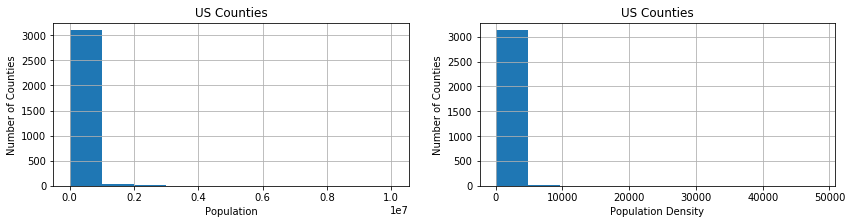

In [180]:

#min, max, mean, and std dev for population
pop_max = combined['pop_estimate_2019'].max()
pop_min = combined['pop_estimate_2019'].min()
pop_mean = combined['pop_estimate_2019'].mean()
pop_std = combined['pop_estimate_2019'].std()

#print stats for population
print("Population:\n")
print("Min: " + str(pop_min))
print("Max: " + str(pop_max))
print("Mean: " + str(pop_mean))
print("Std Dev: " + str(pop_std) + "\n")

#min, max, mean, and std dev for first_date deaths
pop_den_max = combined['pop_density'].max()
pop_den_min = combined['pop_density'].min()
pop_den_mean = combined['pop_density'].mean()
pop_den_std = combined['pop_density'].std()

#print stats for population density
print("Population Density:\n")
print("Min: " + str(pop_den_min))
print("Max: " + str(pop_den_max))
print("Mean: " + str(pop_den_mean))
print("Std Dev: " + str(pop_den_std) + "\n")

#plot stats for first_date
pop_hist = plt.figure(figsize=(14,3))

pop_ax = pop_hist.add_subplot(121)
pop_den_ax = pop_hist.add_subplot(122)

pop_ax.set_title("US Counties")
pop_ax.set_xlabel("Population")
pop_ax.set_ylabel("Number of Counties")

pop_den_ax.set_title("US Counties")
pop_den_ax.set_xlabel("Population Density")
pop_den_ax.set_ylabel("Number of Counties")

combined["pop_estimate_2019"].hist(bins=10, ax=pop_ax)
combined["pop_density"].hist(bins=10, ax=pop_den_ax)
plt.show()



### 13.4 - Data Prep for ML 
Drop irrelevant columns to prepare data for machine learning model

In [183]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
from xgboost import XGBRegressor
import xgboost as xgb
from matplotlib import pyplot
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np 
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from xgboost import plot_importance


### testing to see if we can predict number of deaths instead, being given pop_density and number of cases

# drop_cols = ["date", "deaths", "county", "state", "fips", "land_area", "first_case_date"]
drop_cols = ["date", "county", "state", "fips", "land_area", "first_case_date", "cases"]

prepped_data=temp.drop(columns=drop_cols, axis=1)

# A resource?
# https://www.datastuff.tech/machine-learning/xgboost-predicting-life-expectancy-with-supervised-learning/

# WHAT I USED FOR THE CODE BELOW:
# https://www.datatechnotes.com/2019/06/regression-example-with-xgbregressor-in.html

#taking a subset of the data just to see how the algorithm works without waiting forever
small_data = prepped_data.sample(frac=1, random_state=19)
display(small_data)

# Our y value is 'cases'
# Y = small_data['cases'] 
Y = small_data['case_death_rate'] 

#and remove y column from the dataset
# small_data.drop(labels='cases', axis=1, inplace=True)
small_data.drop(labels='case_death_rate', axis=1, inplace=True)

X = small_data

X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.15)
print(len(X_train), len(y_train), len(X_test), len(y_test))


# # first split data into train and test datasets
# X_train, X_test, y_train, y_test = train_test_split(prepped_data, Y, test_size=0.2, random_state=1)
# # then split the training data into train and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
# print(len(X_train), len(X_val), len(X_test))
# display(prepped_data.corr(method ='kendall'))

display(prepped_data.corrwith(Y, axis = 0) )


,deaths,pop_estimate_2019,pop_density,days_since_first_case,case_death_rate
75645,0,17074,19.722084,1,0.000000
8180,0,672391,10799.726951,13,0.000000
86668,0,138034,150.144669,3,0.000000
639,0,803907,6695.319397,18,0.000000
13001,11,466195,96.333024,31,0.048458
...,...,...,...,...,...
33811,0,109834,59.134789,17,0.000000
86952,0,6347,786.493185,35,0.000000
99682,0,8954,19.808420,9,0.000000
82677,0,152940,109.903850,2,0.000000


104114 104114 18374 18374


deaths                   0.050547
pop_estimate_2019       -0.010165
pop_density             -0.010929
days_since_first_case    0.109933
case_death_rate          1.000000
dtype: float64

### 13.5 Predicting case death rate for a county
Based on number of deaths, population density, population size, and days since first case

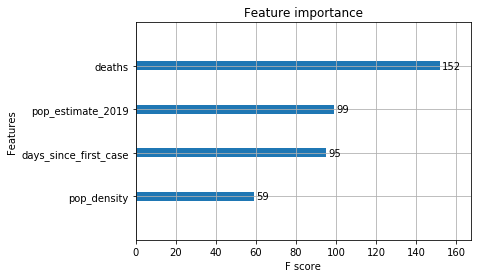

Mean cross-validation score: 0.59
K-fold CV average score: 0.59
MSE: 0.00
RMSE: 0.05


In [184]:
xgbr = XGBRegressor(silent=True, objective='reg:logistic')

# fit the model with the training data
xgbr.fit(X_train, y_train)
plot_importance(xgbr)
pyplot.show()

scores = cross_val_score(xgbr, X_train,y_train,cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

# Cross-validation with a k-fold method can be checked as a following.
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

# Next, we can predict test data and check its accuracy. Here, we'll use MSE and RMSE as accuracy metrics.,
y_pred = xgbr.predict(X_test)

# .sort_values(by=['pop_density', 'days_since_first_case'])

mse = mean_squared_error(y_test,y_pred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % np.sqrt(mse))

# predictions = [round(value) for value in y_pred]
# evaluate predictions
# accuracy = accuracy_score(y_test, y_pred.round(), normalize=False)
# print("Accuracy: %.2f%%" % (accuracy * 100.0))




In [189]:
predicted_df=X_test
predicted_df['predicted_rate']=y_pred*100
predicted_df['actual_rate']=y_test*100
predicted_df['difference']=(predicted_df['predicted_rate']-predicted_df['actual_rate'])
display(predicted_df.sort_values(by=['difference'], ascending=False))


/Users/annagodin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/annagodin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/annagodin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

,deaths,pop_estimate_2019,pop_density,days_since_first_case,predicted_rate,actual_rate,difference
41886,1,89221,79.925647,1,62.824535,14.285714,48.538821
64318,1,3038,8.700135,1,77.644691,33.333333,44.311358
103514,1,5712,8.873561,3,58.507706,16.666667,41.841039
121786,1,9836,10.712963,1,59.361763,20.000000,39.361763
79939,3,4736,2.433935,9,56.078636,20.000000,36.078636
...,...,...,...,...,...,...,...
17519,1,21824,29.789383,21,11.596766,100.000000,-88.403234
78237,2,12426,24.063208,27,11.249833,100.000000,-88.750167
107336,1,65084,21.970766,26,8.228060,100.000000,-91.771940
107339,1,65084,21.970766,29,8.151202,100.000000,-91.848798
